Mounting Google Drive for accessing data

In [ ]:
 #import pictures from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/DataSets_GoogleColab/6211projectdata/

/content/drive/MyDrive/DataSets_GoogleColab/6211projectdata


In [ ]:
train_path = '/content/drive/MyDrive/DataSets_GoogleColab/6211projectdata/train.csv'
test_path = '/content/drive/MyDrive/DataSets_GoogleColab/6211projectdata/test.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv(train_path)
print(train_df.dtypes)

time              object
P                float64
Gb(i)            float64
Gd(i)            float64
H_sun            float64
T2m              float64
WS10m            float64
load             float64
residual_load    float64
dataset_id         int64
dtype: object


In [ ]:
train_df

,time,P,Gb(i),Gd(i),H_sun,T2m,WS10m,load,residual_load,dataset_id
0,2018-01-01 00:00:00,0.0,0.0,0.0,0.0,9.11,5.38,113.5,113.5,1
1,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,8.89,5.43,119.0,119.0,1
2,2018-01-01 00:30:00,0.0,0.0,0.0,0.0,8.66,5.48,117.5,117.5,1
3,2018-01-01 00:45:00,0.0,0.0,0.0,0.0,8.44,5.54,114.5,114.5,1
4,2018-01-01 01:00:00,0.0,0.0,0.0,0.0,8.22,5.59,123.0,123.0,1
...,...,...,...,...,...,...,...,...,...,...
88707,2020-10-10 22:45:00,0.0,0.0,0.0,0.0,6.49,2.83,99.5,99.5,11
88708,2020-10-10 23:00:00,0.0,0.0,0.0,0.0,6.39,2.83,96.5,96.5,11
88709,2020-10-10 23:15:00,0.0,0.0,0.0,0.0,6.34,2.83,100.5,100.5,11
88710,2020-10-10 23:30:00,0.0,0.0,0.0,0.0,6.30,2.83,97.5,97.5,11


Checking for Null Values in the Train Data.
**Result:** No Null values present

In [ ]:
train_df.isnull().sum()

time             0
P                0
Gb(i)            0
Gd(i)            0
H_sun            0
T2m              0
WS10m            0
load             0
residual_load    0
dataset_id       0
dtype: int64

In [ ]:
train_df.head()

,time,P,Gb(i),Gd(i),H_sun,T2m,WS10m,load,residual_load,dataset_id
0,2018-01-01 00:00:00,0.0,0.0,0.0,0.0,9.11,5.38,113.5,113.5,1
1,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,8.89,5.43,119.0,119.0,1
2,2018-01-01 00:30:00,0.0,0.0,0.0,0.0,8.66,5.48,117.5,117.5,1
3,2018-01-01 00:45:00,0.0,0.0,0.0,0.0,8.44,5.54,114.5,114.5,1
4,2018-01-01 01:00:00,0.0,0.0,0.0,0.0,8.22,5.59,123.0,123.0,1


Converting 'time' column into datetime type in order to split date and time values from the column into new columns.

In [ ]:
# Convert the 'time' column to datetime type
train_df['time'] = pd.to_datetime(train_df['time'])

# Split the 'time' column into 'Date' and 'Time' columns
train_df['Date'] = train_df['time'].dt.date
train_df['Time'] = train_df['time'].dt.time

train_df.head()

,time,P,Gb(i),Gd(i),H_sun,T2m,WS10m,load,residual_load,dataset_id,Date,Time
0,2018-01-01 00:00:00,0.0,0.0,0.0,0.0,9.11,5.38,113.5,113.5,1,2018-01-01,00:00:00
1,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,8.89,5.43,119.0,119.0,1,2018-01-01,00:15:00
2,2018-01-01 00:30:00,0.0,0.0,0.0,0.0,8.66,5.48,117.5,117.5,1,2018-01-01,00:30:00
3,2018-01-01 00:45:00,0.0,0.0,0.0,0.0,8.44,5.54,114.5,114.5,1,2018-01-01,00:45:00
4,2018-01-01 01:00:00,0.0,0.0,0.0,0.0,8.22,5.59,123.0,123.0,1,2018-01-01,01:00:00


In [ ]:
print(train_df.dtypes)

time             datetime64[ns]
P                       float64
Gb(i)                   float64
Gd(i)                   float64
H_sun                   float64
T2m                     float64
WS10m                   float64
load                    float64
residual_load           float64
dataset_id                int64
Date                     object
Time                     object
dtype: object


Before applying the VAR(Vector Auto Regression) model, all the time series variables in the data should be stationary.
Stationarity is a statistical property in which the time series show constant mean and variance over time.

We check this using the **Augmented Dickey Fuller** test.

In the ADF test, there is a null hypothesis that the time series is considered non-stationary.
So, if the p-value of the test is less than the significance level then it rejects the null hypothesis and considers that the time series is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
from pandas import Series, DataFrame

def adf_test(train_df,title='Check for Stationarity'):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(train_df.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")


In [ ]:
adf_test(train_df['P'])

Augmented Dickey-Fuller Test: Check for Stationarity
ADF test statistic        -25.065158
p-value                     0.000000
# lags used                66.000000
# observations          88645.000000
critical value (1%)        -3.430424
critical value (5%)        -2.861573
critical value (10%)       -2.566787
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(train_df['Gb(i)'])

Augmented Dickey-Fuller Test: Check for Stationarity
ADF test statistic        -25.878376
p-value                     0.000000
# lags used                66.000000
# observations          88645.000000
critical value (1%)        -3.430424
critical value (5%)        -2.861573
critical value (10%)       -2.566787
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(train_df['Gd(i)'])

Augmented Dickey-Fuller Test: Check for Stationarity
ADF test statistic        -27.473554
p-value                     0.000000
# lags used                66.000000
# observations          88645.000000
critical value (1%)        -3.430424
critical value (5%)        -2.861573
critical value (10%)       -2.566787
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(train_df['H_sun'])

Augmented Dickey-Fuller Test: Check for Stationarity
ADF test statistic     -1.103458e+01
p-value                 5.558530e-20
# lags used             6.600000e+01
# observations          8.864500e+04
critical value (1%)    -3.430424e+00
critical value (5%)    -2.861573e+00
critical value (10%)   -2.566787e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(train_df['T2m'])

Augmented Dickey-Fuller Test: Check for Stationarity
ADF test statistic         -4.075811
p-value                     0.001062
# lags used                66.000000
# observations          88645.000000
critical value (1%)        -3.430424
critical value (5%)        -2.861573
critical value (10%)       -2.566787
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(train_df['WS10m'])

Augmented Dickey-Fuller Test: Check for Stationarity
ADF test statistic     -1.494862e+01
p-value                 1.290330e-27
# lags used             6.600000e+01
# observations          8.864500e+04
critical value (1%)    -3.430424e+00
critical value (5%)    -2.861573e+00
critical value (10%)   -2.566787e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(train_df['load'])

Augmented Dickey-Fuller Test: Check for Stationarity
ADF test statistic        -21.472396
p-value                     0.000000
# lags used                66.000000
# observations          88645.000000
critical value (1%)        -3.430424
critical value (5%)        -2.861573
critical value (10%)       -2.566787
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(train_df['residual_load'])

Augmented Dickey-Fuller Test: Check for Stationarity
ADF test statistic        -21.819327
p-value                     0.000000
# lags used                66.000000
# observations          88645.000000
critical value (1%)        -3.430424
critical value (5%)        -2.861573
critical value (10%)       -2.566787
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


**Result for Dickey Fuller Test:** All Variables are stationary.

Alternatively, if any variables are not stationary then a first order difference is taken on that variable to make it stationary.

Code:
df_difference = df.diff()

adf_test(df_difference['variable_name']

The test is re-run on that variable to check for stationarity.

adf_test(train_df['variable_name'])

IndexError: index 8 is out of bounds for axis 0 with size 8

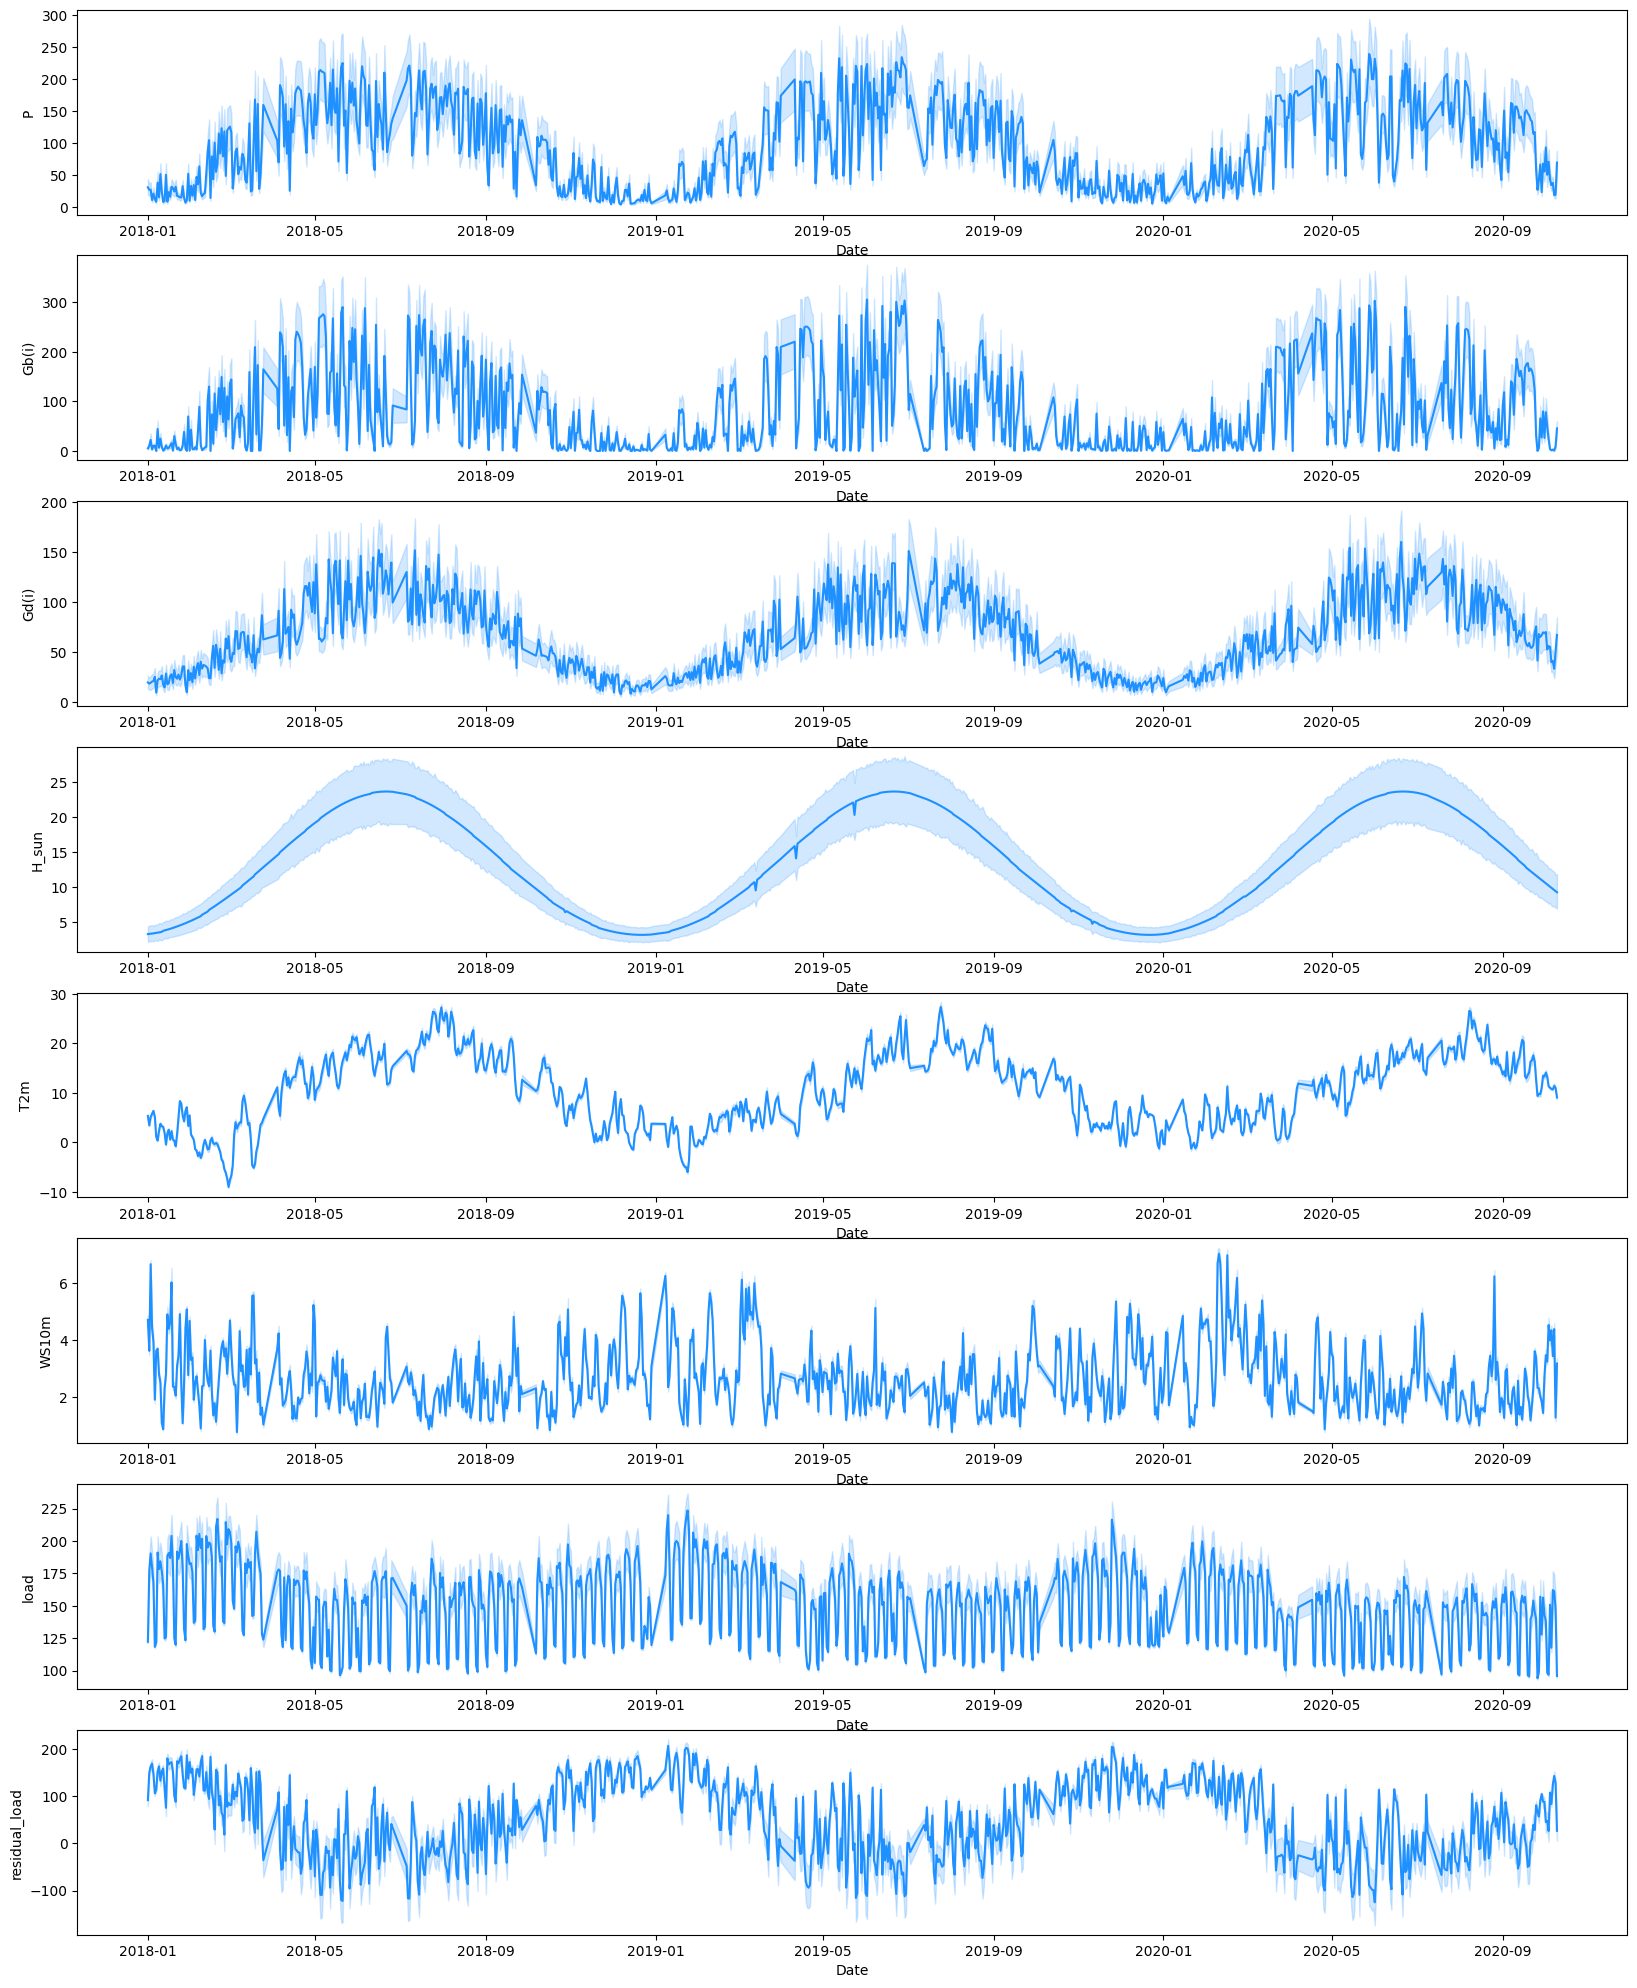

In [ ]:
# To compelte the data, as naive method, we will use ffill
import seaborn as sns
f, ax = plt.subplots(nrows=8, ncols=1, figsize=(20, 25))

for i, column in enumerate(train_df.drop('time', axis=1).columns):
    sns.lineplot(x=train_df['Date'], y=train_df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_ylabel(ylabel=column, fontsize=10)

Interpreting variables:


IndexError: index 8 is out of bounds for axis 0 with size 8

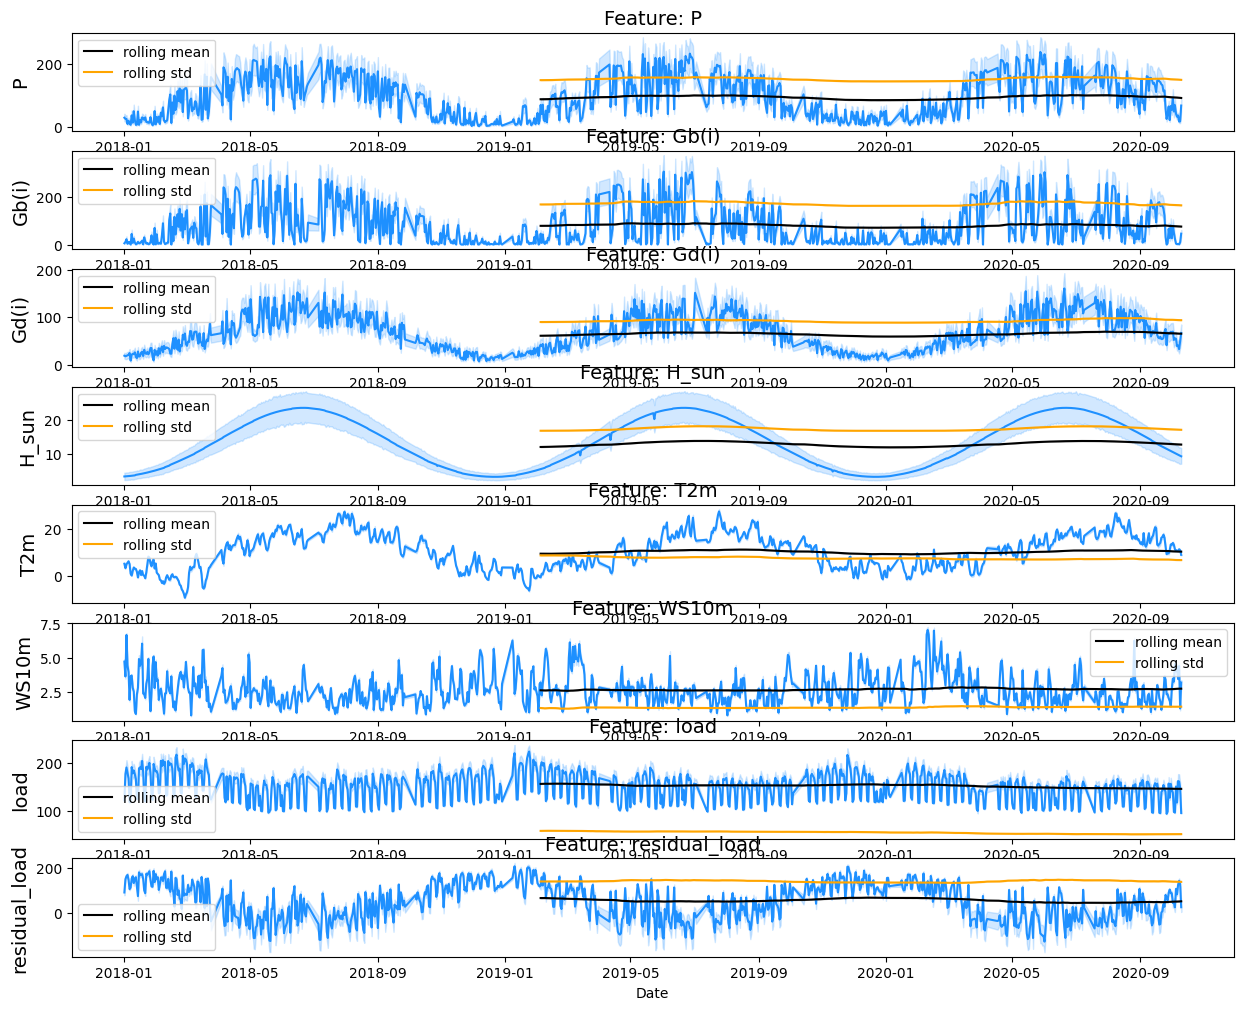

In [ ]:
rolling_window = 34944
f, ax = plt.subplots(nrows=8, ncols=1, figsize=(15, 12))

for i, column in enumerate(train_df.drop('time', axis=1).columns):
    sns.lineplot(x=train_df['Date'], y=train_df[column], ax=ax[i], color='dodgerblue')
    sns.lineplot(x=train_df['Date'], y=train_df[column].rolling(rolling_window).mean(), ax=ax[i], color='black', label='rolling mean')
    sns.lineplot(x=train_df['Date'], y=train_df[column].rolling(rolling_window).std(), ax=ax[i], color='orange', label='rolling std')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)

In [ ]:
train_df.head()

,time,P,Gb(i),Gd(i),H_sun,T2m,WS10m,load,residual_load,dataset_id,Date,Time
0,2018-01-01 00:00:00,0.0,0.0,0.0,0.0,9.11,5.38,113.5,113.5,1,2018-01-01,00:00:00
1,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,8.89,5.43,119.0,119.0,1,2018-01-01,00:15:00
2,2018-01-01 00:30:00,0.0,0.0,0.0,0.0,8.66,5.48,117.5,117.5,1,2018-01-01,00:30:00
3,2018-01-01 00:45:00,0.0,0.0,0.0,0.0,8.44,5.54,114.5,114.5,1,2018-01-01,00:45:00
4,2018-01-01 01:00:00,0.0,0.0,0.0,0.0,8.22,5.59,123.0,123.0,1,2018-01-01,01:00:00


In [ ]:
# Drop the 'time' column
train_df = pd.read_csv(train_path)
train_df2 = train_df.drop('time', axis = 1)
train_df2 = train_df2.drop('dataset_id', axis = 1)
train_df2

,P,Gb(i),Gd(i),H_sun,T2m,WS10m,load,residual_load
0,0.0,0.0,0.0,0.0,9.11,5.38,113.5,113.5
1,0.0,0.0,0.0,0.0,8.89,5.43,119.0,119.0
2,0.0,0.0,0.0,0.0,8.66,5.48,117.5,117.5
3,0.0,0.0,0.0,0.0,8.44,5.54,114.5,114.5
4,0.0,0.0,0.0,0.0,8.22,5.59,123.0,123.0
...,...,...,...,...,...,...,...,...
88707,0.0,0.0,0.0,0.0,6.49,2.83,99.5,99.5
88708,0.0,0.0,0.0,0.0,6.39,2.83,96.5,96.5
88709,0.0,0.0,0.0,0.0,6.34,2.83,100.5,100.5
88710,0.0,0.0,0.0,0.0,6.30,2.83,97.5,97.5


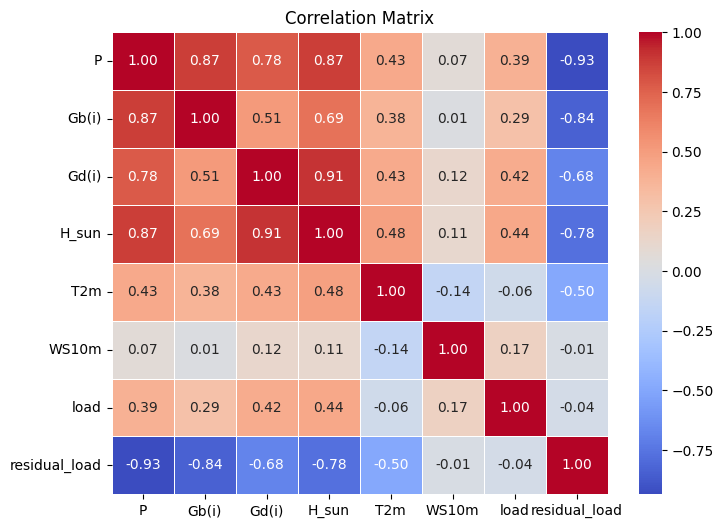

In [ ]:
# Calculate correlation matrix

corr_matrix = train_df2.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Checking for the Train and Validate data sets

Using VAR model - to check Order P

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


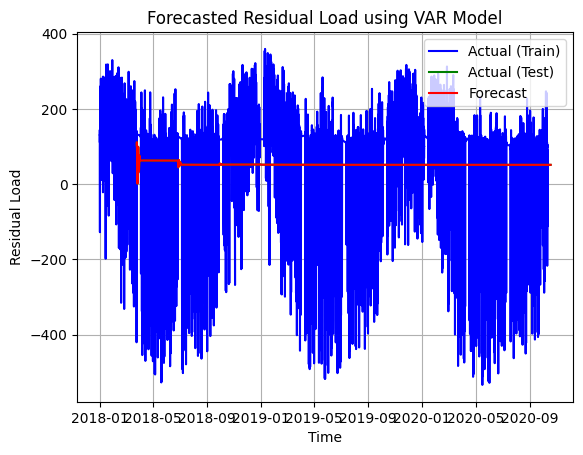

In [ ]:
#### VAR

import pandas as pd
from statsmodels.tsa.api import VAR

# Load train.csv and test.csv data
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Convert dates to datetime format
train_data['time'] = pd.to_datetime(train_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

# Prepare train data for VAR
train_df = train_data[['time', 'residual_load', 'Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m']]
train_df.set_index('time', inplace=True)

# Prepare test data for VAR
test_df = test_data[['time', 'Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m']]
test_df.set_index('time', inplace=True)

# Fit VAR model to training data
model = VAR(train_df)
results = model.fit()

# Forecast using VAR model
forecast = results.forecast(train_df.values[-results.k_ar:], len(test_df))

# Extract the forecasted values for residual_load
forecast_residual_load = forecast[:, 0]  # Assuming residual_load is the first column in the forecast array

# Create DataFrame for forecasted residual_load
forecast_df = pd.DataFrame({'residual_load': forecast_residual_load}, index=test_df.index)

# Save the forecasted residual load to a CSV file
forecast_df.to_csv('output_var.csv', index_label='time')


import matplotlib.pyplot as plt

# Plot actual residual load
plt.plot(train_df.index, train_df['residual_load'], label='Actual (Train)', color='blue')
plt.plot(forecast_df.index, forecast_df['residual_load'], label='Actual (Test)', color='green')

# Plot forecasted residual load
plt.plot(forecast_df.index, forecast_df['residual_load'], label='Forecast', color='red')

plt.xlabel('Time')
plt.ylabel('Residual Load')
plt.title('Forecasted Residual Load using VAR Model')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 03, May, 2024
Time:                     00:21:46
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    7.71363
Nobs:                     88711.0    HQIC:                   7.71054
Log likelihood:      -1.09716e+06    FPE:                    2228.71
AIC:                      7.70918    Det(Omega_mle):         2227.66
--------------------------------------------------------------------
Results for equation residual_load
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.617811         0.215889           -2.862           0.004
L1.residual_load         0.966908         0.000944         1024.260           0.000
L1.Gb(i)                -0.014343       

In [ ]:
#### VAR

import pandas as pd
from statsmodels.tsa.api import VAR

# Load train.csv and test.csv data
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Convert dates to datetime format
train_data['time'] = pd.to_datetime(train_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

# Prepare train data for VAR
train_df = train_data[['time', 'residual_load', 'H_sun', 'T2m', 'WS10m']]
train_df.set_index('time', inplace=True)

# Prepare test data for VAR
test_df = test_data[['time', 'H_sun', 'T2m', 'WS10m']]
test_df.set_index('time', inplace=True)

# Fit VAR model to training data
model = VAR(train_df)
results = model.fit()

# Forecast using VAR model
forecast = results.forecast(train_df.values[-results.k_ar:], len(test_df))

# Extract the forecasted values for residual_load
forecast_residual_load = forecast[:, 0]  # Assuming residual_load is the first column in the forecast array

# Create DataFrame for forecasted residual_load
forecast_df = pd.DataFrame({'residual_load': forecast_residual_load}, index=test_df.index)

# Save the forecasted residual load to a CSV file
forecast_df.to_csv('output_var.csv', index_label='time')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 03, May, 2024
Time:                     00:21:47
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -2.60981
Nobs:                     88711.0    HQIC:                  -2.61128
Log likelihood:          -387629.    FPE:                  0.0733932
AIC:                     -2.61192    Det(Omega_mle):       0.0733766
--------------------------------------------------------------------
Results for equation residual_load
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -2.571360         0.194491          -13.221           0.000
L1.residual_load         0.980235         0.000689         1421.994           0.000
L1.H_sun                -0.202181       

<ipython-input-53-e78db065f062>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'time': 'ds', 'residual_load': 'y'}, inplace=True)
<ipython-input-53-e78db065f062>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'time': 'ds'}, inplace=True)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpji_mhwqk/nv3l3qxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpji_mhwqk/nkahp_wb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64870',

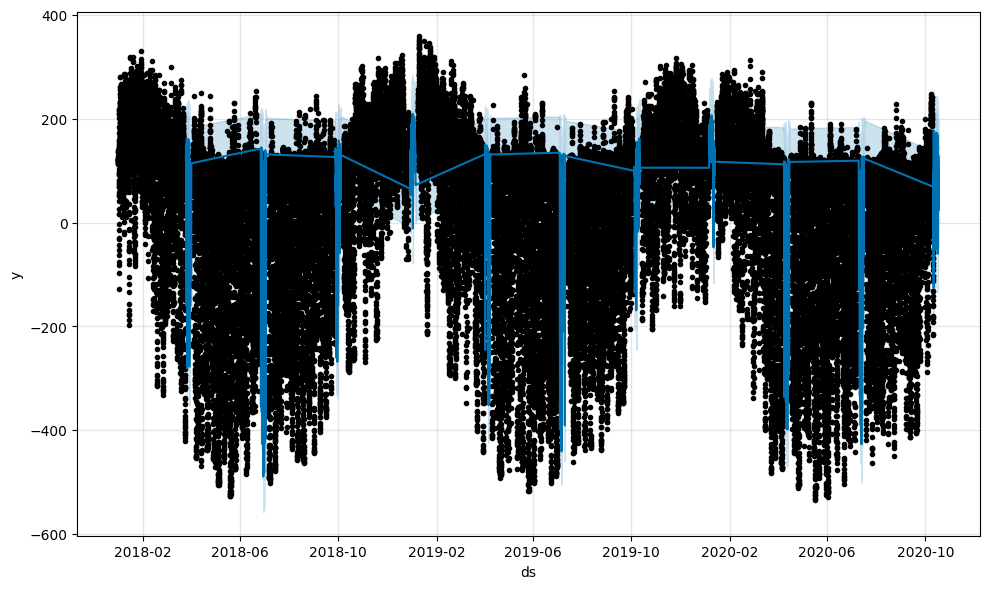

In [ ]:
#### Prophet ---> residual_load

import pandas as pd
from prophet import Prophet


# Load train and test data into DataFrames
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Convert dates to datetime format
train_data['time'] = pd.to_datetime(train_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

# Prepare train data for Prophet
train_df = train_data[['time', 'residual_load', 'Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m']]
train_df.rename(columns={'time': 'ds', 'residual_load': 'y'}, inplace=True)

# Prepare test data for Prophet
test_df = test_data[['time', 'Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m']]
test_df.rename(columns={'time': 'ds'}, inplace=True)

# Instantiate Prophet model with additional regressors
model = Prophet()
model.add_regressor('Gb(i)')
model.add_regressor('Gd(i)')
model.add_regressor('H_sun')
model.add_regressor('T2m')
model.add_regressor('WS10m')

# Fit the model to training data
model.fit(train_df)

# Make predictions on test data
forecast = model.predict(test_df)

# Visualize the forecast
fig = model.plot(forecast)


In [ ]:
from prophet.utilities import regressor_coefficients
regressor_coef = regressor_coefficients(model)
regressor_coef[['regressor', 'regressor_mode', 'coef']].sort_values('coef')

,regressor,regressor_mode,coef
2,H_sun,additive,-1.988393
0,Gb(i),additive,-0.523959
1,Gd(i),additive,-0.490601
3,T2m,additive,-0.333278
4,WS10m,additive,0.471832


<ipython-input-55-8df07f3edb75>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'time': 'ds', 'residual_load': 'y'}, inplace=True)
<ipython-input-55-8df07f3edb75>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'time': 'ds'}, inplace=True)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpji_mhwqk/moyltvj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpji_mhwqk/uweylli0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95765',

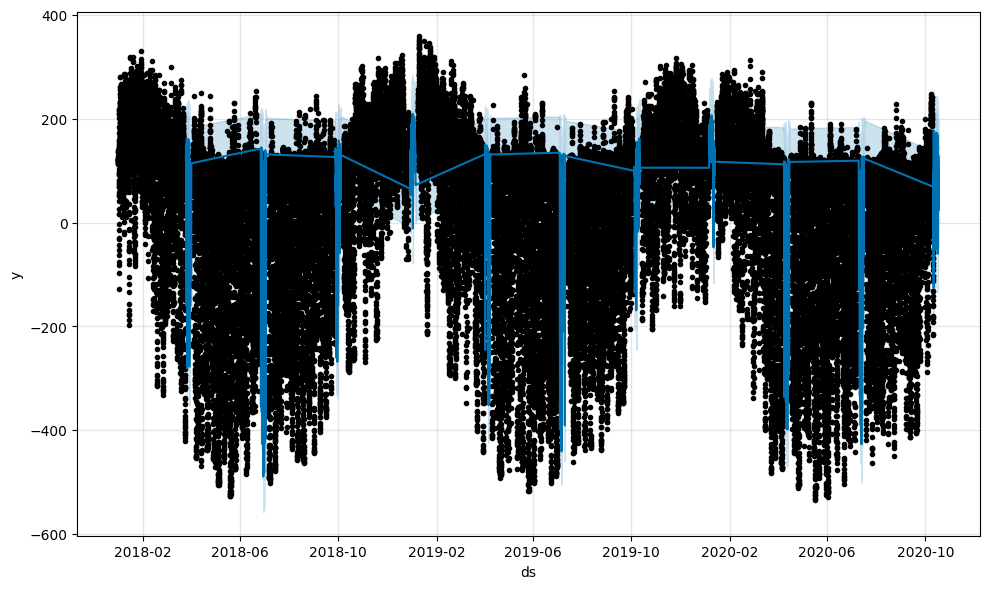

In [ ]:
#####revised
#### Prophet ---> residual_load

import pandas as pd
from prophet import Prophet


# Load train and test data into DataFrames
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Convert dates to datetime format
train_data['time'] = pd.to_datetime(train_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

# Prepare train data for Prophet
train_df = train_data[['time', 'residual_load', 'H_sun', 'T2m', 'WS10m']]
train_df.rename(columns={'time': 'ds', 'residual_load': 'y'}, inplace=True)

# Prepare test data for Prophet
test_df = test_data[['time', 'H_sun', 'T2m', 'WS10m']]
test_df.rename(columns={'time': 'ds'}, inplace=True)

# Instantiate Prophet model with additional regressors
model1 = Prophet()
model1.add_regressor('H_sun')
model1.add_regressor('T2m')
model1.add_regressor('WS10m')

# Fit the model to training data
model1.fit(train_df)

# Make predictions on test data
forecast1 = model1.predict(test_df)

# Visualize the forecast
fig = model1.plot(forecast)



In [ ]:
from prophet.utilities import regressor_coefficients
regressor_coef = regressor_coefficients(model1)
regressor_coef[['regressor', 'regressor_mode', 'coef']].sort_values('coef')

,regressor,regressor_mode,coef
0,H_sun,additive,-7.818486
1,T2m,additive,-4.420537
2,WS10m,additive,6.245690


In [ ]:
'''
# Extract time and predicted residual load from the forecast DataFrame
output_df = forecast1[['ds', 'yhat']]

# Rename columns for clarity
output_df.rename(columns={'ds': 'time', 'yhat': 'residual_load'}, inplace=True)

# Save the output DataFrame to a CSV file
output_df.to_csv('output.csv', index=False)

from google.colab import files
files.download('output.csv')
'''

"\n# Extract time and predicted residual load from the forecast DataFrame\noutput_df = forecast1[['ds', 'yhat']]\n\n# Rename columns for clarity\noutput_df.rename(columns={'ds': 'time', 'yhat': 'residual_load'}, inplace=True)\n\n# Save the output DataFrame to a CSV file\noutput_df.to_csv('output.csv', index=False)\n\nfrom google.colab import files\nfiles.download('output.csv')\n"

In [ ]:
final_data = pd.read_csv(test_path)

In [ ]:
##### Prophet --> p

import pandas as pd
from prophet import Prophet


# Load train and test data into DataFrames
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Convert dates to datetime format
train_data['time'] = pd.to_datetime(train_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

# Prepare train data for Prophet
train_df = train_data[['time', 'P', 'Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m']]
train_df.rename(columns={'time': 'ds', 'P': 'y'}, inplace=True)

# Prepare test data for Prophet
test_df = test_data[['time', 'Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m']]
test_df.rename(columns={'time': 'ds'}, inplace=True)

# Instantiate Prophet model with additional regressors
model = Prophet()
model.add_regressor('Gb(i)')
model.add_regressor('Gd(i)')
model.add_regressor('H_sun')
model.add_regressor('T2m')
model.add_regressor('WS10m')

# Fit the model to training data
model.fit(train_df)



<ipython-input-59-c226e5fcbe9f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'time': 'ds', 'P': 'y'}, inplace=True)
<ipython-input-59-c226e5fcbe9f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'time': 'ds'}, inplace=True)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpji_mhwqk/qoq7c34q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpji_mhwqk/gs5ynlf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86655', 'data', 'fi

In [ ]:
from prophet.utilities import regressor_coefficients
regressor_coef = regressor_coefficients(model)
regressor_coef[['regressor', 'regressor_mode', 'coef']].sort_values('coef')

,regressor,regressor_mode,coef
4,WS10m,additive,-0.254592
3,T2m,additive,-0.215645
1,Gd(i),additive,0.484105
0,Gb(i),additive,0.517225
2,H_sun,additive,1.863230


In [ ]:
### revised
##### Prophet --> p

import pandas as pd
from prophet import Prophet


# Load train and test data into DataFrames
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Convert dates to datetime format
train_data['time'] = pd.to_datetime(train_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

# Prepare train data for Prophet
train_df = train_data[['time', 'P', 'H_sun', 'T2m', 'WS10m']]
train_df.rename(columns={'time': 'ds', 'P': 'y'}, inplace=True)

# Prepare test data for Prophet
test_df = test_data[['time', 'H_sun', 'T2m', 'WS10m']]
test_df.rename(columns={'time': 'ds'}, inplace=True)

# Instantiate Prophet model with additional regressors
model = Prophet()
model.add_regressor('H_sun')
model.add_regressor('T2m')
model.add_regressor('WS10m')

# Fit the model to training data
model.fit(train_df)

# Make predictions on test data
forecast = model.predict(test_df)

# Append predicted values of 'p' to the test data
final_data['p_predicted'] = forecast['yhat'].values

# Visualize the forecast
fig = model.plot(forecast)


<ipython-input-61-a50477d3c17d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'time': 'ds', 'P': 'y'}, inplace=True)
<ipython-input-61-a50477d3c17d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'time': 'ds'}, inplace=True)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpji_mhwqk/3_os7nq3.json


KeyboardInterrupt: 

In [ ]:
from prophet.utilities import regressor_coefficients
regressor_coef = regressor_coefficients(model)
regressor_coef[['regressor', 'regressor_mode', 'coef']].sort_values('coef')

In [ ]:
###### Prophet ---> load

import pandas as pd
from prophet import Prophet


# Load train and test data into DataFrames
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Convert dates to datetime format
train_data['time'] = pd.to_datetime(train_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

# Prepare train data for Prophet
train_df = train_data[['time','load']]
train_df.rename(columns={'time': 'ds', 'load': 'y'}, inplace=True)

# Prepare test data for Prophet
test_df = test_data[['time']]
test_df.rename(columns={'time': 'ds'}, inplace=True)

# Instantiate Prophet model with additional regressors
model = Prophet()

# Fit the model to training data
model.fit(train_df)

# Make predictions on test data
forecast = model.predict(test_df)

# Append predicted values of 'p' to the test data
final_data['load_predicted'] = forecast['yhat'].values

# Visualize the forecast
fig = model.plot(forecast)


In [ ]:
from prophet.utilities import regressor_coefficients
regressor_coef = regressor_coefficients(model)
regressor_coef[['regressor', 'regressor_mode', 'coef']].sort_values('coef')

In [ ]:
final_data['residual_load'] = final_data['load_predicted'] - final_data['p_predicted']

# Assuming your dataset is stored in a DataFrame called 'df'
# List of columns to drop
columns_to_drop = ['Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m', 'dataset_id', 'p_predicted', 'load_predicted']

# Dropping the specified columns
final_data = final_data.drop(columns=columns_to_drop)

# Printing the DataFrame after dropping the columns
print(final_data)

In [ ]:
'''
# Save the output DataFrame to a CSV file
final_data.to_csv('output.csv', index=False)

from google.colab import files
files.download('output.csv')
'''